<a href="https://colab.research.google.com/github/ShubhamTibrewal01/GAN_Assignment1/blob/main/ans2exp-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your first deep neural network

# imports

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar10

# data

In [28]:
NUM_CLASSES = 10

In [29]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [30]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [31]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [32]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(160, activation = 'relu')(x)
x = Dense(120, activation = 'relu')(x)
x = Dense(80, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [33]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 200)               614600    
_________________________________________________________________
dense_15 (Dense)             (None, 160)               32160     
_________________________________________________________________
dense_16 (Dense)             (None, 120)               19320     
_________________________________________________________________
dense_17 (Dense)             (None, 80)                9680      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                810 

# train

In [34]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [35]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8534 - accuracy: 0.3220
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6759 - accuracy: 0.3974
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5895 - accuracy: 0.4304
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5318 - accuracy: 0.4497
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4899 - accuracy: 0.4657
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4529 - accuracy: 0.4807
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4256 - accuracy: 0.4893
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4005 - accuracy: 0.4967
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3777 - accuracy: 0.5030
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.353

# analysis

In [36]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4501 - accuracy: 0.4845


[1.450134038925171, 0.484499990940094]

In [37]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

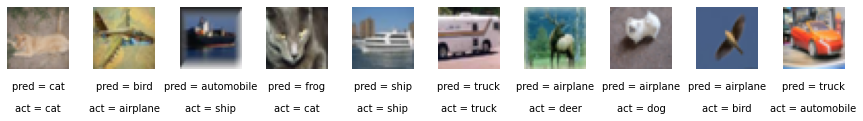

In [38]:

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
